# Image processing and produce stamp images

In this analysis, we will combine HST and JWST/NIRCam images of MACS0647-JD1 galaxy without PSF matching (to get highest spatial resolution possible) while applying oversampling to the spatial sampling of NIRCam SW bands (0.02''/pixel).

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

%matplotlib inline

## Setup inputs

In [2]:
# Set of filters
filters = ['hst_acs_f435w', 'hst_acs_f475w', 'hst_acs_f555w', 'hst_acs_f606w', 'hst_acs_f625w', 'hst_acs_f775w', 
           'hst_acs_f814w', 'hst_acs_f850lp', 'jwst_nircam_f115w', 'jwst_nircam_f150w', 'jwst_nircam_f200w', 
           'jwst_nircam_f277w', 'jwst_nircam_f356w', 'jwst_nircam_f444w', 'jwst_nircam_f480m']
nbands = len(filters)

# directory of the images
dir_images = '../../images/'

# input science images
sci_img = {}
sci_img['hst_acs_f435w'] = 'macs0647-grizli-v6.0-f435w_drc_sci.fits.gz'
sci_img['hst_acs_f475w'] = 'macs0647-grizli-v6.0-f475w_drc_sci.fits.gz'
sci_img['hst_acs_f555w'] = 'macs0647-grizli-v6.0-f555w_drc_sci.fits.gz'
sci_img['hst_acs_f606w'] = 'macs0647-grizli-v6.0-f606w_drc_sci.fits.gz'
sci_img['hst_acs_f625w'] = 'macs0647-grizli-v6.0-f625w_drc_sci.fits.gz'
sci_img['hst_acs_f775w'] = 'macs0647-grizli-v6.0-f775w_drc_sci.fits.gz'
sci_img['hst_acs_f814w'] = 'macs0647-grizli-v6.0-f814w_drc_sci.fits.gz'
sci_img['hst_acs_f850lp'] = 'macs0647-grizli-v6.0-f850lp_drc_sci.fits.gz'
sci_img['jwst_nircam_f115w'] = 'macs0647-grizli-v6.0-f115w-clear_drc_sci.fits.gz'
sci_img['jwst_nircam_f150w'] = 'macs0647-grizli-v6.0-f150w-clear_drc_sci.fits.gz'
sci_img['jwst_nircam_f200w'] = 'macs0647-grizli-v6.0-f200w-clear_drc_sci.fits.gz'
sci_img['jwst_nircam_f277w'] = 'macs0647-grizli-v6.0-f277w-clear_drc_sci.fits.gz'
sci_img['jwst_nircam_f356w'] = 'macs0647-grizli-v6.0-f356w-clear_drc_sci.fits.gz'
sci_img['jwst_nircam_f444w'] = 'macs0647-grizli-v6.0-f444w-clear_drc_sci.fits.gz'
sci_img['jwst_nircam_f480m'] = 'macs0647-grizli-v6.0-f480m-clear_drc_sci.fits.gz'

# input weight images
wht_img = {}
wht_img['hst_acs_f435w'] = 'macs0647-grizli-v6.0-f435w_drc_wht.fits.gz'
wht_img['hst_acs_f475w'] = 'macs0647-grizli-v6.0-f475w_drc_wht.fits.gz'
wht_img['hst_acs_f555w'] = 'macs0647-grizli-v6.0-f555w_drc_wht.fits.gz'
wht_img['hst_acs_f606w'] = 'macs0647-grizli-v6.0-f606w_drc_wht.fits.gz'
wht_img['hst_acs_f625w'] = 'macs0647-grizli-v6.0-f625w_drc_wht.fits.gz'
wht_img['hst_acs_f775w'] = 'macs0647-grizli-v6.0-f775w_drc_wht.fits.gz'
wht_img['hst_acs_f814w'] = 'macs0647-grizli-v6.0-f814w_drc_wht.fits.gz'
wht_img['hst_acs_f850lp'] = 'macs0647-grizli-v6.0-f850lp_drc_wht.fits.gz'
wht_img['jwst_nircam_f115w'] = 'macs0647-grizli-v6.0-f115w-clear_drc_wht.fits.gz'
wht_img['jwst_nircam_f150w'] = 'macs0647-grizli-v6.0-f150w-clear_drc_wht.fits.gz'
wht_img['jwst_nircam_f200w'] = 'macs0647-grizli-v6.0-f200w-clear_drc_wht.fits.gz'
wht_img['jwst_nircam_f277w'] = 'macs0647-grizli-v6.0-f277w-clear_drc_wht.fits.gz'
wht_img['jwst_nircam_f356w'] = 'macs0647-grizli-v6.0-f356w-clear_drc_wht.fits.gz'
wht_img['jwst_nircam_f444w'] = 'macs0647-grizli-v6.0-f444w-clear_drc_wht.fits.gz'
wht_img['jwst_nircam_f480m'] = 'macs0647-grizli-v6.0-f480m-clear_drc_wht.fits.gz'

# input variance images
var_img = {}
for bb in range(nbands):
    var_img[filters[bb]] = 'var_'+wht_img[filters[bb]]
    
# Convolution kernels to be used for PSF matching
dir_kernel = '../../PSFs_kernels/'
kernels = {}
kernels['hst_acs_f435w'] = dir_kernel+'kernel_HST_F435W_to_JWST_F480M.fits'
kernels['hst_acs_f475w'] = dir_kernel+'kernel_HST_F475W_to_JWST_F480M.fits'
kernels['hst_acs_f555w'] = dir_kernel+'kernel_HST_F555W_to_JWST_F480M.fits'
kernels['hst_acs_f606w'] = dir_kernel+'kernel_HST_F606W_to_JWST_F480M.fits'
kernels['hst_acs_f625w'] = dir_kernel+'kernel_HST_F625W_to_JWST_F480M.fits'
kernels['hst_acs_f775w'] = dir_kernel+'kernel_HST_F775W_to_JWST_F480M.fits'
kernels['hst_acs_f814w'] = dir_kernel+'kernel_HST_F814W_to_JWST_F480M.fits'
kernels['hst_acs_f850lp'] = dir_kernel+'kernel_HST_F850LP_to_JWST_F480M.fits'
kernels['jwst_nircam_f115w'] = dir_kernel+'kernel_JWST_F115W_to_JWST_F480M.fits'
kernels['jwst_nircam_f150w'] = dir_kernel+'kernel_JWST_F150W_to_JWST_F480M.fits'
kernels['jwst_nircam_f200w'] = dir_kernel+'kernel_JWST_F200W_to_JWST_F480M.fits'
kernels['jwst_nircam_f277w'] = dir_kernel+'kernel_JWST_F277W_to_JWST_F480M.fits'
kernels['jwst_nircam_f356w'] = dir_kernel+'kernel_JWST_F356W_to_JWST_F480M.fits'
kernels['jwst_nircam_f444w'] = dir_kernel+'kernel_JWST_F444W_to_JWST_F480M.fits'
kernels['jwst_nircam_f480m'] = None

# The unit, scale, and pixel size
# Pixel size can be obtained using calc_pixsize function
from piXedfit.piXedfit_images import calc_pixsize

img_unit = {}
img_scale = {}
img_pixsizes = {}
for bb in range(0,nbands):
    img_unit[filters[bb]] = 'erg/s/cm2/A'
    
    hdu = fits.open(dir_images+sci_img[filters[bb]])
    img_scale[filters[bb]] = float(hdu[0].header['PHOTFLAM'])
    hdu.close()
    
    img_pixsizes[filters[bb]] = calc_pixsize(dir_images+sci_img[filters[bb]])

# The coordinate and redshift of MACS0647-JD1. 
# In general, redshift information is optional here. 
# We use photometric redshift estimate from EAZY code.
oriID = 3593
gal_ra = 101.982268
gal_dec = 70.243282
gal_z = 10.17

# Size of the stamp images to be produced from the image processing
stamp_size = [111,111]

## Run image processing

In [3]:
from piXedfit.piXedfit_images import images_processing

# We don't do PSF matching in this anlysis, so we set flag_psfmatch=1
# We will also apply oversampling by reprojecting the images to match the spatial sampling of F150W (0.02"/pixel) and without PSF matching
flag_psfmatch = 1
flag_reproject = 0
idfil_align = 9
img_process = images_processing(filters, sci_img, var_img, gal_ra, gal_dec, dir_images=dir_images, img_unit=img_unit, img_scale=img_scale, 
                                run_image_processing=True, flag_psfmatch=flag_psfmatch, flag_reproject=flag_reproject, img_pixsizes=img_pixsizes, 
                                gal_z=gal_z, stamp_size=stamp_size, idfil_align=9)

produce crop_macs0647-grizli-v6.0-f435w_drc_sci.fits.gz
produce crop_var_macs0647-grizli-v6.0-f435w_drc_wht.fits.gz
produce crop_macs0647-grizli-v6.0-f475w_drc_sci.fits.gz
produce crop_var_macs0647-grizli-v6.0-f475w_drc_wht.fits.gz
produce crop_macs0647-grizli-v6.0-f555w_drc_sci.fits.gz
produce crop_var_macs0647-grizli-v6.0-f555w_drc_wht.fits.gz
produce crop_macs0647-grizli-v6.0-f606w_drc_sci.fits.gz
produce crop_var_macs0647-grizli-v6.0-f606w_drc_wht.fits.gz
produce crop_macs0647-grizli-v6.0-f625w_drc_sci.fits.gz
produce crop_var_macs0647-grizli-v6.0-f625w_drc_wht.fits.gz
produce crop_macs0647-grizli-v6.0-f775w_drc_sci.fits.gz
produce crop_var_macs0647-grizli-v6.0-f775w_drc_wht.fits.gz
produce crop_macs0647-grizli-v6.0-f814w_drc_sci.fits.gz
produce crop_var_macs0647-grizli-v6.0-f814w_drc_wht.fits.gz
produce crop_macs0647-grizli-v6.0-f850lp_drc_sci.fits.gz
produce crop_var_macs0647-grizli-v6.0-f850lp_drc_wht.fits.gz
produce crop_macs0647-grizli-v6.0-f115w-clear_drc_sci.fits.gz
produce 

## Plot stamp images

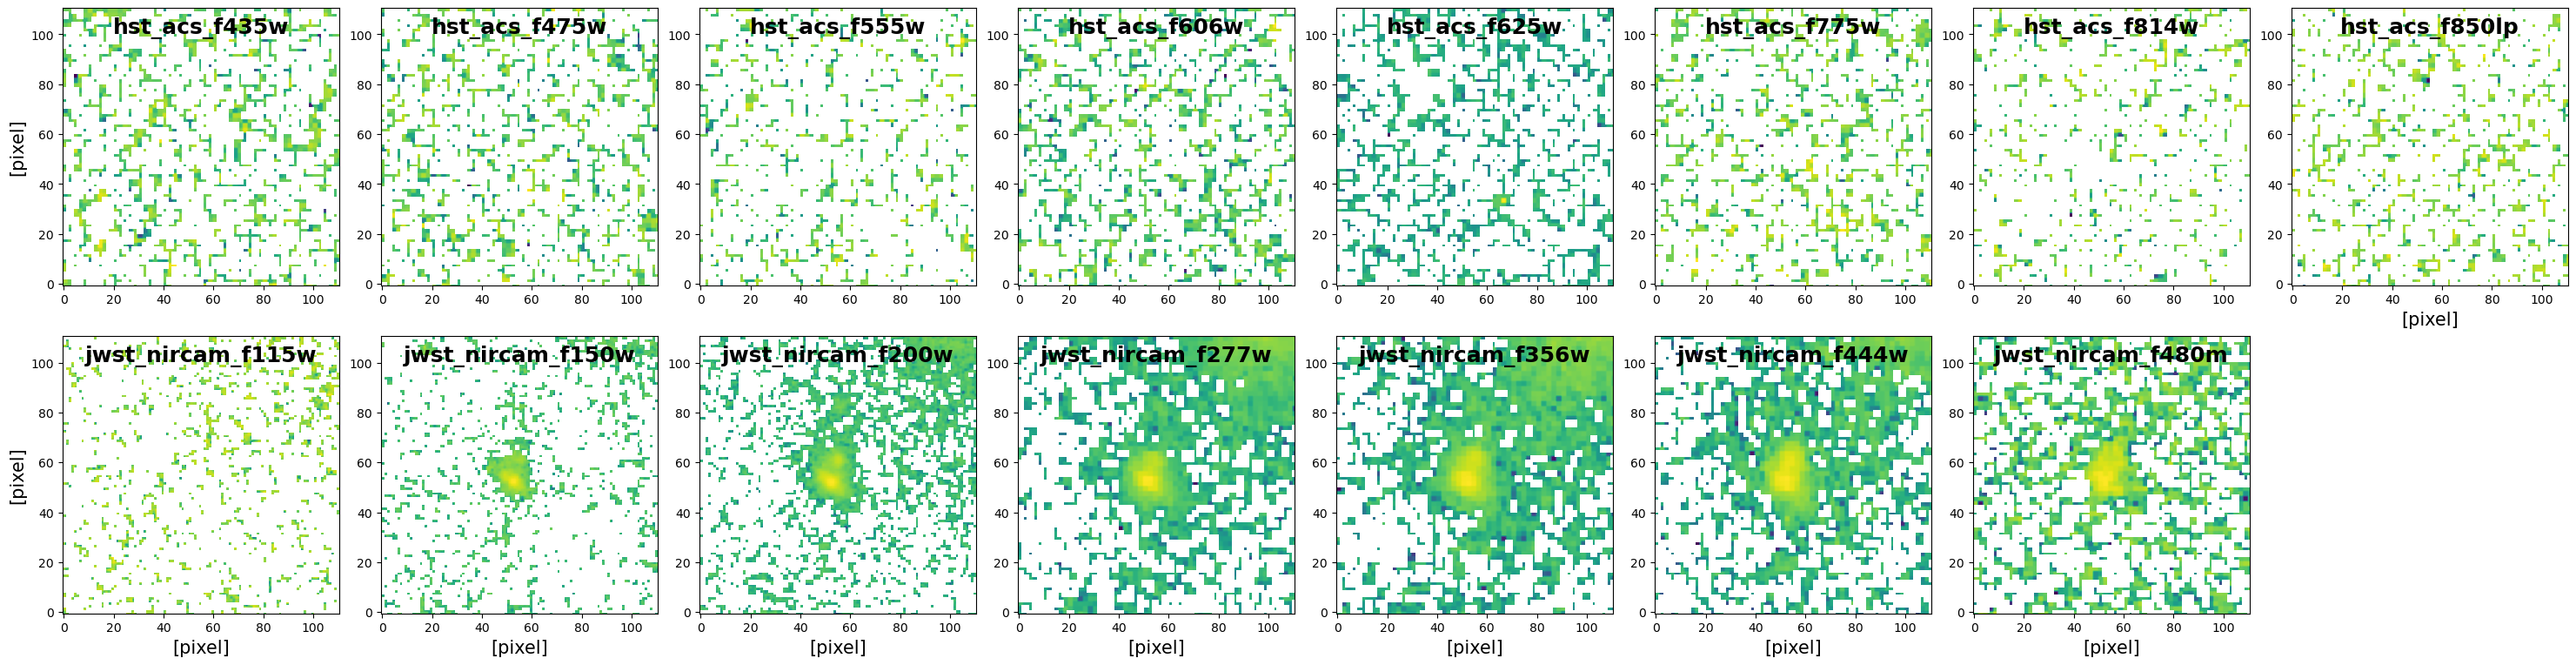

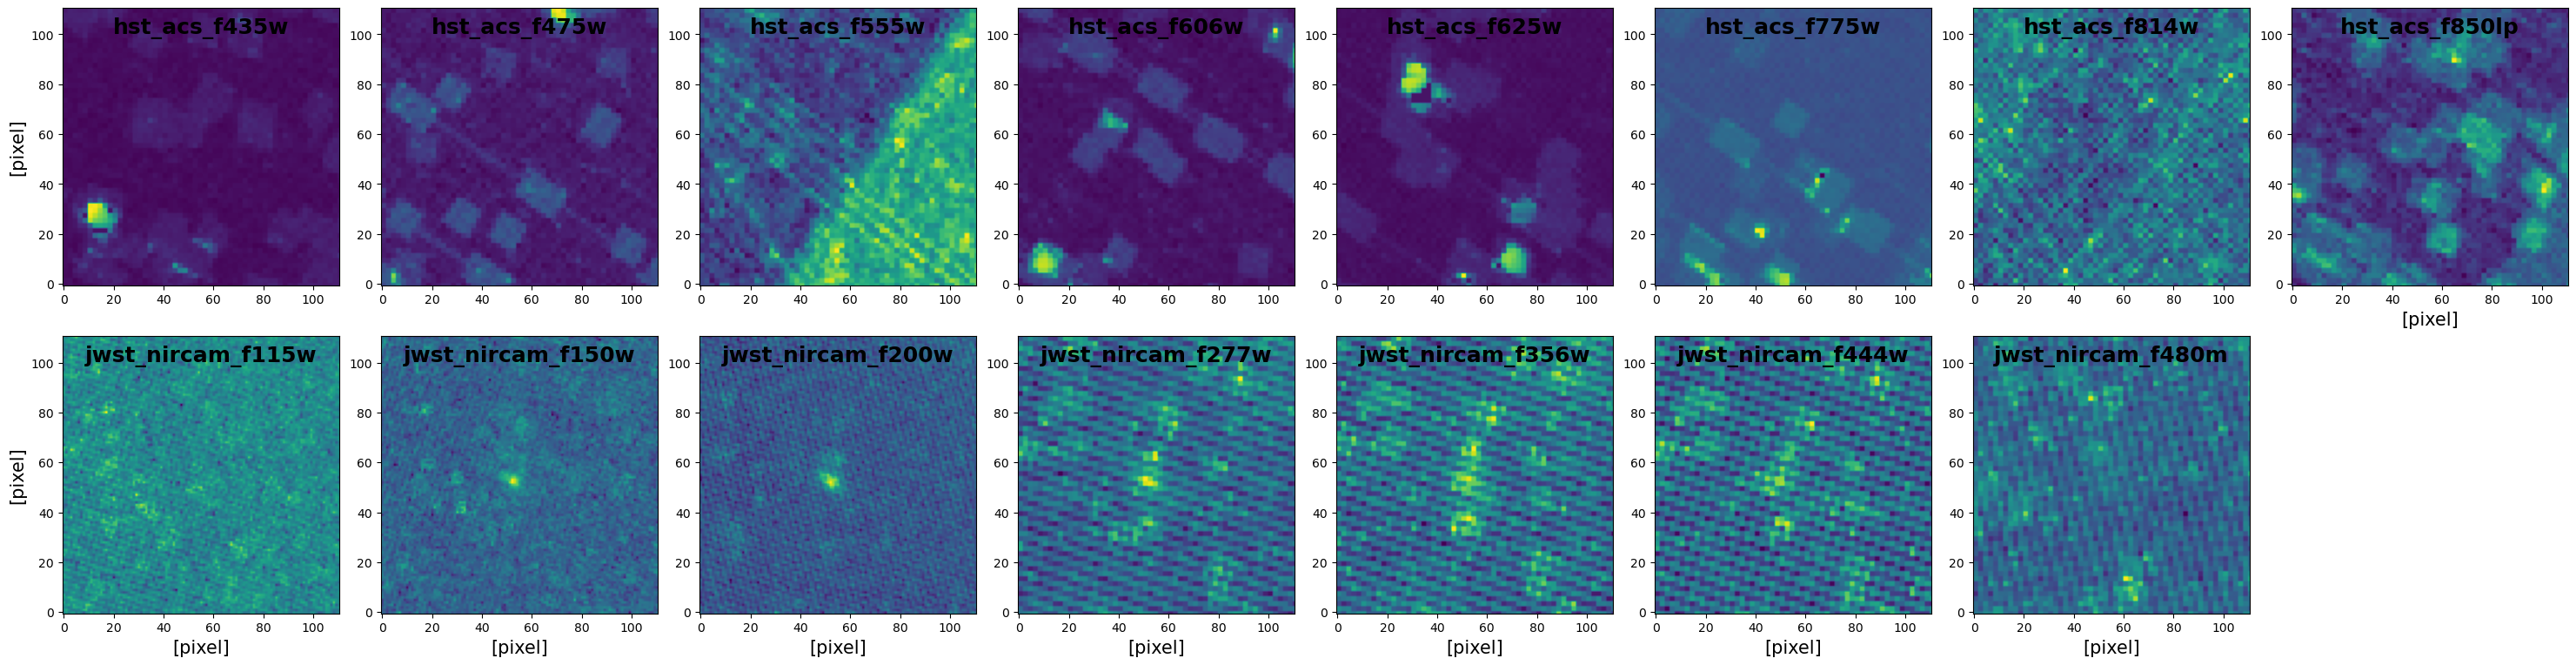

In [4]:
%matplotlib inline
img_process.plot_image_stamps(ncols=8)

## Print out the names of stamp images for later usages

This is to avoid running image processing everytime we want to measure different photometry.

In [5]:
# print out the names of stamp images
output_stamps = img_process.get_output_stamps()
print (output_stamps)

{'name_img_hst_acs_f435w': 'stamp_crop_macs0647-grizli-v6.0-f435w_drc_sci.fits.gz', 'name_var_hst_acs_f435w': 'stamp_crop_var_macs0647-grizli-v6.0-f435w_drc_wht.fits.gz', 'idfil_align': 9, 'idfil_psfmatch': 0, 'name_img_hst_acs_f475w': 'stamp_crop_macs0647-grizli-v6.0-f475w_drc_sci.fits.gz', 'name_var_hst_acs_f475w': 'stamp_crop_var_macs0647-grizli-v6.0-f475w_drc_wht.fits.gz', 'name_img_hst_acs_f555w': 'stamp_crop_macs0647-grizli-v6.0-f555w_drc_sci.fits.gz', 'name_var_hst_acs_f555w': 'stamp_crop_var_macs0647-grizli-v6.0-f555w_drc_wht.fits.gz', 'name_img_hst_acs_f606w': 'stamp_crop_macs0647-grizli-v6.0-f606w_drc_sci.fits.gz', 'name_var_hst_acs_f606w': 'stamp_crop_var_macs0647-grizli-v6.0-f606w_drc_wht.fits.gz', 'name_img_hst_acs_f625w': 'stamp_crop_macs0647-grizli-v6.0-f625w_drc_sci.fits.gz', 'name_var_hst_acs_f625w': 'stamp_crop_var_macs0647-grizli-v6.0-f625w_drc_wht.fits.gz', 'name_img_hst_acs_f775w': 'stamp_crop_macs0647-grizli-v6.0-f775w_drc_sci.fits.gz', 'name_var_hst_acs_f775w': '